In [1]:
import cv2
import torch
# from google.colab.patches import cv2_imshow
import numpy as np


In [3]:

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')


Using cache found in /home/shukra/.cache/torch/hub/ultralytics_yolov5_master


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 885.9/885.9 kB 5.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 1.5 MB/s eta 0:00:00a 0:00:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/home/shukra/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
requirements: Ultralytics requirement ['gitpython>=3.1.30'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 2.0s, installed 1 package: ['gitpython>=3.1.30']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-11-14 Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1650, 3719MiB)

100%|██████████| 14.1M/14.1M [00:42<00:00, 351kB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [4]:
image_path = "../images/city.jpg"
image = cv2.imread(image_path)


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


results = model(image_rgb)


results.print()




/home/shukra/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 183x276 12 persons, 3 cars, 4 traffic lights
Speed: 23.9ms pre-process, 55.0ms inference, 87.2ms NMS per image at shape (1, 3, 448, 640)


In [ ]:

image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

cv2.imshow('Image', image_bgr)



NameError: name 'cv2_imshow' is not defined

In [49]:
results = model(image_rgb)


results.print()

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 183x276 12 persons, 3 cars, 4 traffic lights
Speed: 2.6ms pre-process, 11.2ms inference, 1.7ms NMS per image at shape (1, 3, 448, 640)


In [50]:
labels = results.names
boxes = results.xywh[0].cpu().numpy()

In [51]:
max_area = 0
max_area_box = None
max_confidence = 0
max_label = None

In [76]:
for i, box in enumerate(boxes):
    x_center, y_center, width, height, confidence, class_id = box

    area = width * height

    if area > max_area:
        max_area = area
        max_area_box = box
        max_confidence = confidence
        max_label = labels[int(class_id)]


if max_area_box is not None:
    x_center, y_center, width, height, _, _ = max_area_box
    x1 = int(x_center - width / 2)
    y1 = int(y_center - height / 2)
    x2 = int(x_center + width / 2)
    y2 = int(y_center + height / 2)


    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    # Optionally, add label and confidence score text
    label = f"{max_label} {max_confidence:.2f}"
    cv2.putText(image, label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Step 7: Display the image with the largest object bounding box
image_bgr = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Ensure proper format for display
cv2_imshow(image_bgr)

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'


## Now, start with the heatmap thing

In [53]:
from transformers import pipeline
from PIL import Image

pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Small-hf")


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [60]:
image = Image.open('/content/city (2).jpg')
depth_mapping = pipe(image)

In [69]:
%matplotlib inline

In [70]:
print(depth_mapping["predicted_depth"])


tensor([[2.54906, 2.54959, 2.55292,  ..., 2.61254, 2.62138, 2.46078],
        [2.57028, 2.57248, 2.54945,  ..., 2.60828, 2.63661, 2.64369],
        [2.56963, 2.55875, 2.54482,  ..., 2.60668, 2.62236, 2.63262],
        ...,
        [5.30827, 5.30028, 5.29544,  ..., 5.33634, 5.33674, 5.35957],
        [5.41595, 5.41740, 5.40190,  ..., 5.44077, 5.44364, 5.45904],
        [5.50450, 5.50120, 5.51708,  ..., 5.56677, 5.59148, 5.58952]])


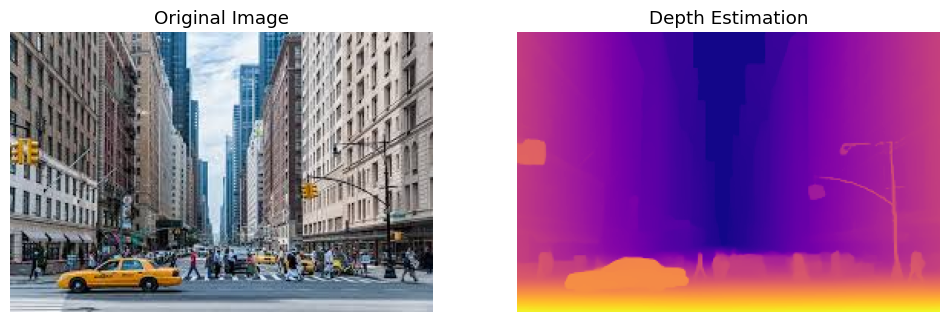

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

# Show the depth map
plt.subplot(1, 2, 2)
plt.imshow(depth_mapping["depth"], cmap='plasma')  # cmap='plasma' gives a nice color map for depth
plt.title("Depth Estimation")
plt.axis("off")

plt.show()

## Depth map from the mapping values


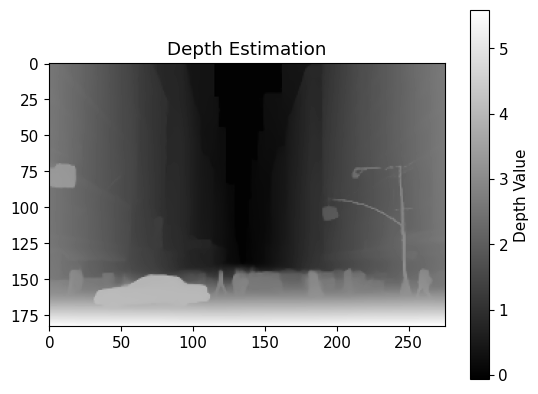

In [73]:
import matplotlib.pyplot as plt
import torch

# Display the depth map
plt.imshow(depth_mapping["predicted_depth"].cpu().numpy(), cmap='gray')
plt.colorbar(label='Depth Value')
plt.title("Depth Estimation")
plt.show()


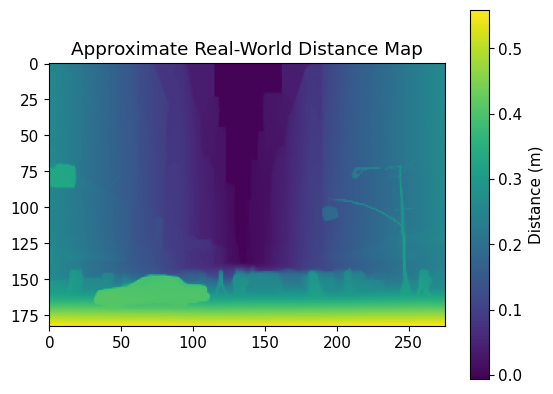

In [74]:
focal_length = 35
scaling_factor = 0.1


real_world_distance = depth_mapping["predicted_depth"].cpu().numpy() * scaling_factor

import matplotlib.pyplot as plt

plt.imshow(real_world_distance, cmap='viridis')
plt.colorbar(label='Distance (m)')
plt.title("Approximate Real-World Distance Map")
plt.show()


In [75]:
cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

x_center = (x1 + x2) // 2
y_center = (y1 + y2) // 2

# Optional: Draw the center point on the image (e.g., a red circle)
cv2.circle(image, (x_center, y_center), 5, (0, 0, 255), -1)
cv2.imshow("Image with Bounding Box and Center", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'
